In [1]:
import numpy as np
import cooltools
import cooler
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from scipy.stats import zscore
import pandas as pd

from numutils import observed_over_expected, adaptive_coarsegrain
import colormaps

In [2]:
##### to plot ticks in terms of megabases we use the EngFormatter
# https://matplotlib.org/gallery/api/engineering_formatter.html
from matplotlib.ticker import EngFormatter
bp_formatter = EngFormatter('b')
def format_ticks(ax, x=True, y=True, rotate=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)      

In [3]:
# Functions

def getRealMatrix(mcool, resolution, chrom, start, end):
    coolres = "%s::resolutions/%d" % (path, resolution)
    clr = cooler.Cooler(coolres)
    region = (chrom, start, end)
    mat = clr.matrix(balance=True).fetch(region)
    mat_raw = clr.matrix(balance=False).fetch(region)
    mat_cg = adaptive_coarsegrain(mat, mat_raw)
    return mat, mat_cg

def getOrcaMatrix(path_prefix, width):
    path = "%s_%s.txt" % (path_prefix, width)
    mat = np.loadtxt(path,comments="#")
    return mat

def get_observed_over_expected(A):
    A = mat_cg
    A[~np.isfinite(A)] = 0
    mask = A.sum(axis=0) > 0
    OE, _, _, _ = observed_over_expected(A, mask)
    return OE

In [4]:
path="../../data/4DNFI9GMP2J8.rebinned.mcool"
orca_path_prefix = "../../Orca/human/human_ESC_orca_predictions"

In [5]:
resolution=128_000
chrom, start, end = "chr9", 94_900_000, 126_900_000
mat, mat_cg = getRealMatrix(path, resolution, chrom, start, end)
realOE =  get_observed_over_expected(mat_cg)
predOE = getOrcaMatrix(orca_path_prefix, "32Mb")

/home/tfaraut/mnt/bioinfogeno/dynawork/Stages/Florian/IA3D/notebooks/numutils.py:282: RuntimeWarning: invalid value encountered in true_divide
  val_cur = ar_cur / armask_cur


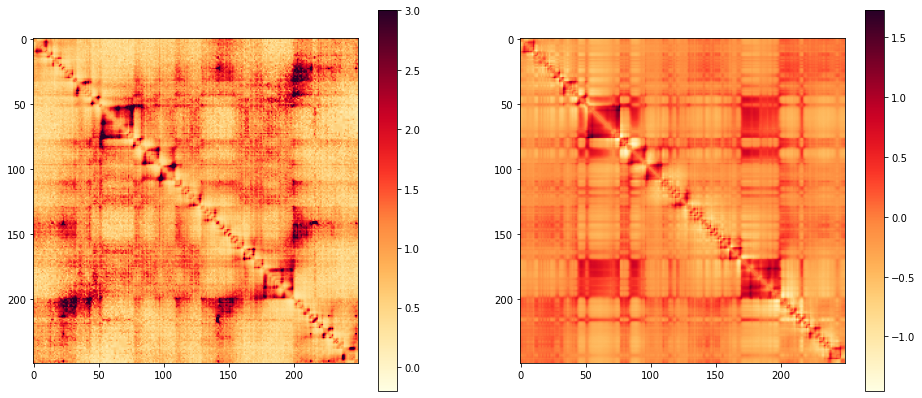

In [6]:
plt.figure(figsize=(16,7))
ax = plt.subplot(121)
plt.imshow(realOE, cmap=colormaps.hnh_cmap_ext5, vmin=-0.2, vmax=3)
plt.colorbar()
plt.subplot(122, sharex=ax, sharey=ax)
plt.imshow(predOE, cmap=colormaps.hnh_cmap_ext5)
plt.colorbar()

In [7]:
resolution=64_000
chrom, start, end = "chr9", 102_836_000, 118_836_000
mat, mat_cg = getRealMatrix(path, resolution, chrom, start, end)
realOE =  get_observed_over_expected(mat_cg)
predOE = getOrcaMatrix(orca_path_prefix, "16Mb")

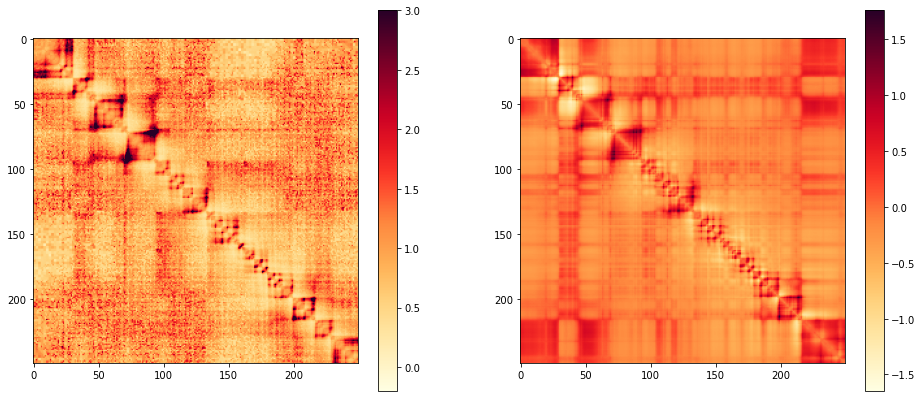

In [8]:
plt.figure(figsize=(16,7))
ax = plt.subplot(121)
plt.imshow(realOE, cmap=colormaps.hnh_cmap_ext5, vmin=-0.2, vmax=3)
plt.colorbar()
plt.subplot(122, sharex=ax, sharey=ax)
plt.imshow(predOE, cmap=colormaps.hnh_cmap_ext5)
plt.colorbar()

In [9]:
resolution=32_000
chrom, start, end = "chr9", 106_868_000, 114_868_000
mat, mat_cg = getRealMatrix(path, resolution, chrom, start, end)
realOE =  get_observed_over_expected(mat_cg)
predOE = getOrcaMatrix(orca_path_prefix, "8Mb")

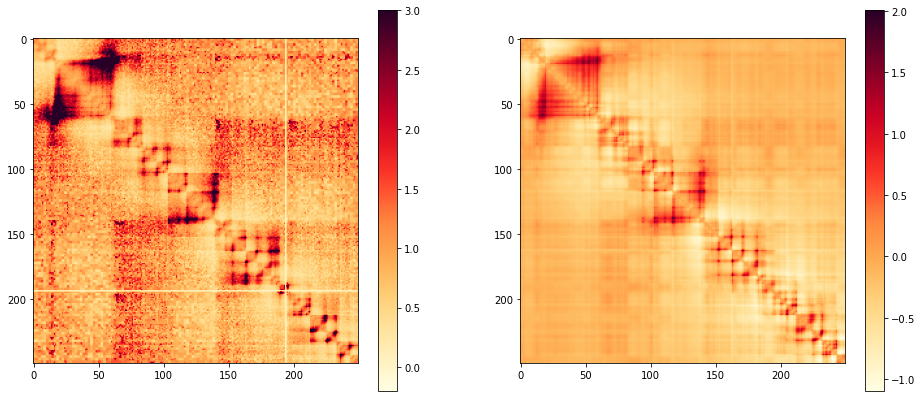

In [10]:
plt.figure(figsize=(16,7))
ax = plt.subplot(121)
plt.imshow(realOE, cmap=colormaps.hnh_cmap_ext5, vmin=-0.2, vmax=3)
plt.colorbar()
plt.subplot(122, sharex=ax, sharey=ax)
plt.imshow(predOE, cmap=colormaps.hnh_cmap_ext5)
plt.colorbar()

In [11]:
resolution=16_000
chrom, start, end = "chr9", 108_884_000, 112_884_000
mat, mat_cg = getRealMatrix(path, resolution, chrom, start, end)
realOE =  get_observed_over_expected(mat_cg)
predOE = getOrcaMatrix(orca_path_prefix, "4Mb")

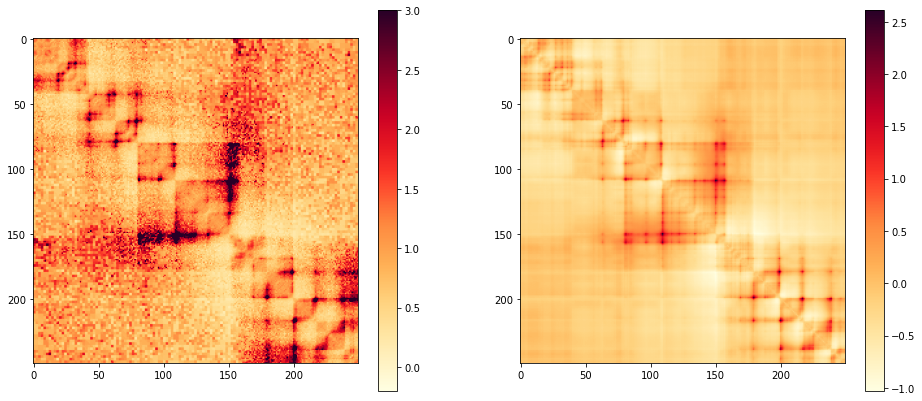

In [12]:
plt.figure(figsize=(16,7))
ax = plt.subplot(121)
plt.imshow(realOE, cmap=colormaps.hnh_cmap_ext5, vmin=-0.2, vmax=3)
plt.colorbar()
plt.subplot(122, sharex=ax, sharey=ax)
plt.imshow(predOE, cmap=colormaps.hnh_cmap_ext5)
plt.colorbar()

In [13]:
resolution=8_000
chrom, start, end = "chr9", 109_892_000, 111_892_000
mat, mat_cg = getRealMatrix(path, resolution, chrom, start, end)
realOE =  get_observed_over_expected(mat_cg)
predOE = getOrcaMatrix(orca_path_prefix, "2Mb")

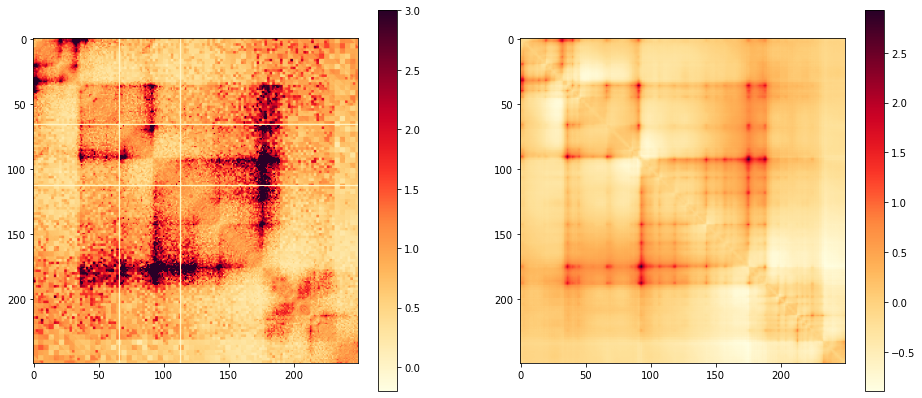

In [14]:
plt.figure(figsize=(16,7))
ax = plt.subplot(121)
plt.imshow(realOE, cmap=colormaps.hnh_cmap_ext5, vmin=-0.2, vmax=3)
plt.colorbar()
plt.subplot(122, sharex=ax, sharey=ax)
plt.imshow(predOE, cmap=colormaps.hnh_cmap_ext5)
plt.colorbar()

In [15]:
resolution=4_000
chrom, start, end = "chr9", 110_396_000, 111_396_000
mat, mat_cg = getRealMatrix(path, resolution, chrom, start, end)
mat, mat_cg = getRealMatrix(path, resolution, chrom, start, end)
realOE =  get_observed_over_expected(mat_cg)
predOE = getOrcaMatrix(orca_path_prefix, "1Mb")

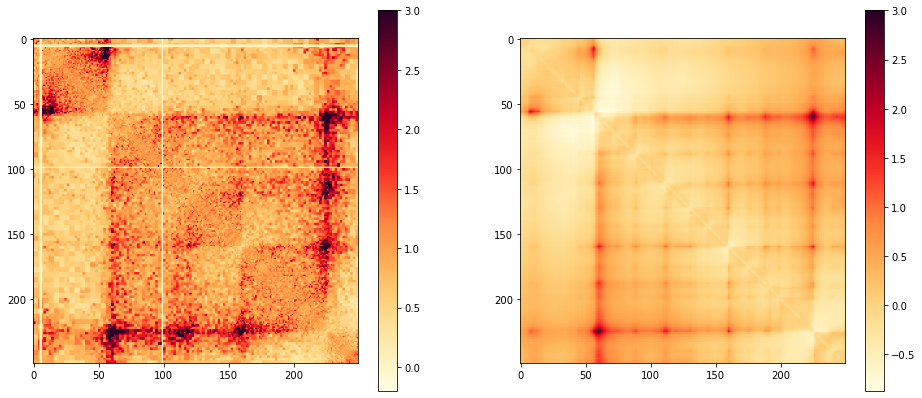

In [16]:
plt.figure(figsize=(16,7))
ax = plt.subplot(121)
plt.imshow(realOE, cmap=colormaps.hnh_cmap_ext5, vmin=-0.2, vmax=3)
plt.colorbar()
plt.subplot(122, sharex=ax, sharey=ax)
plt.imshow(predOE, cmap=colormaps.hnh_cmap_ext5)
plt.colorbar()

## Plotting the correlations

In [19]:
resolution=64_000
chrom, start, end = "chr9", 102_836_000, 118_836_000
mat, mat_cg = getRealMatrix(path, resolution, chrom, start, end)
realOE =  get_observed_over_expected(mat_cg)
predOE = getOrcaMatrix(orca_path_prefix, "16Mb")

In [26]:
flat_realOE = realOE.flatten()
flat_predOE = predOE.flatten()
size = min(len(flat_realOE), len(flat_predOE))

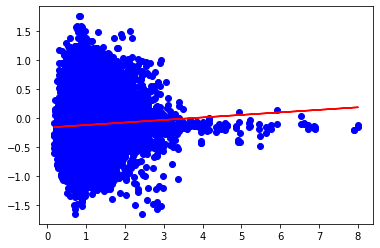

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

x = flat_realOE[:size]
y = flat_predOE[:size]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Generate predicted values
y_pred = slope * x + intercept

# Plot scatter points
plt.scatter(x, y, color='blue', label='Data points')

# Plot regression line
plt.plot(x, y_pred, color='red', label=f'Line: y = {slope:.2f}x + {intercept:.2f}')

# Show the plot
plt.show()